In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset=load_iris()
data=pd.DataFrame(dataset['data'],columns=['Petal length','Petal Width','Sepal Length','Sepal Width'])
data['Species']=dataset['target']
data['Species']=data['Species'].apply(lambda x: dataset['target_names'][x])

In [3]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.isnull().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


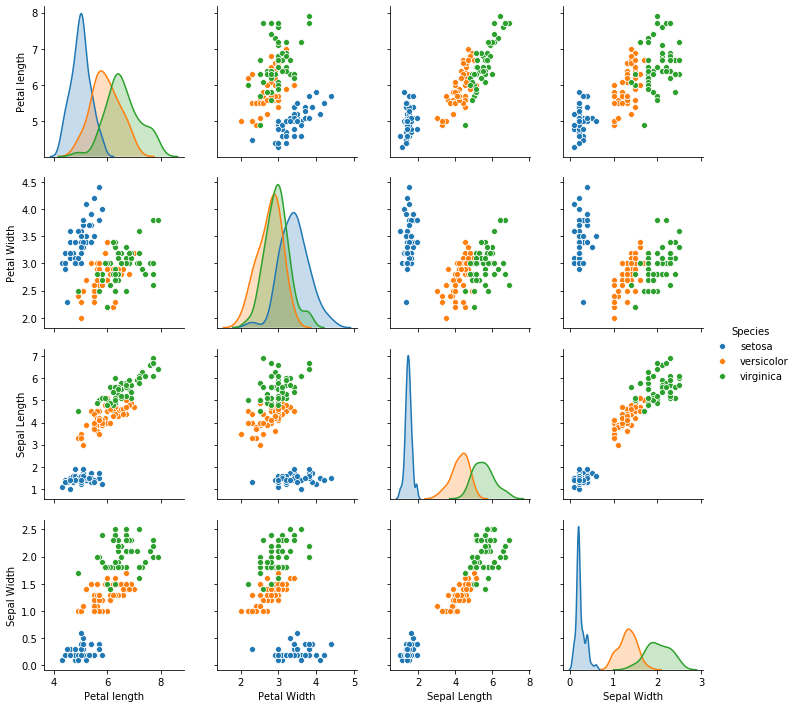

In [8]:
sns.pairplot(data,hue='Species')

[]

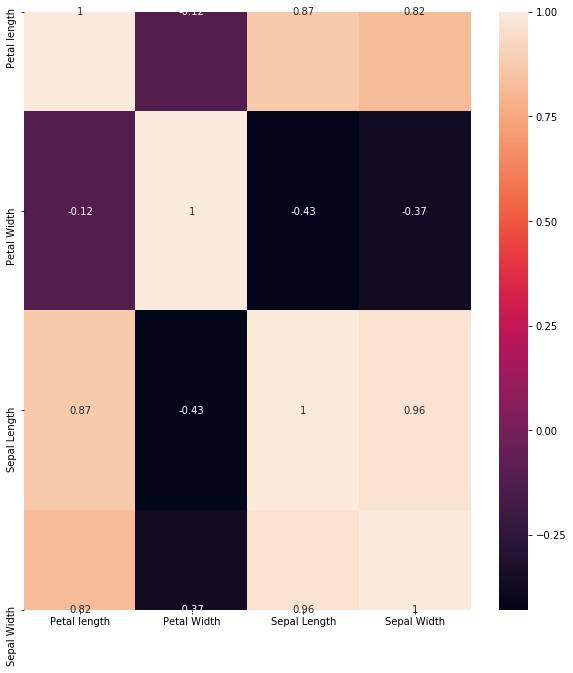

In [10]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

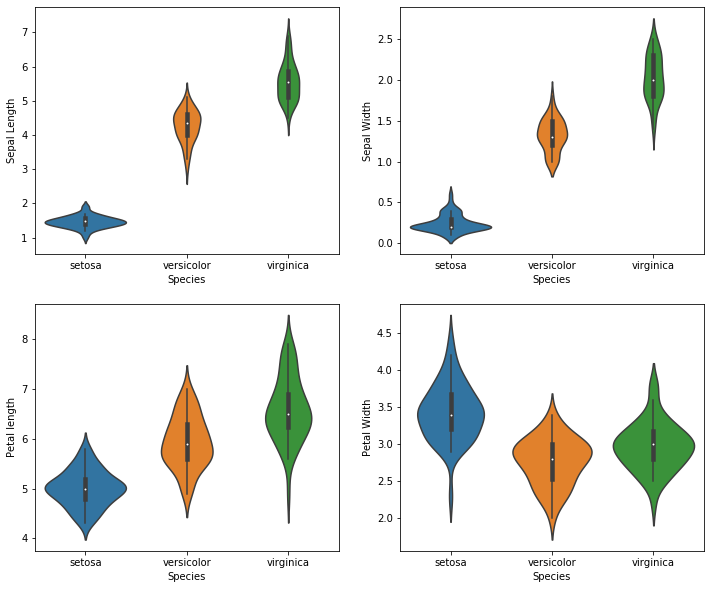

In [11]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='Sepal Length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='Sepal Width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='Petal length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='Petal Width',data=data)

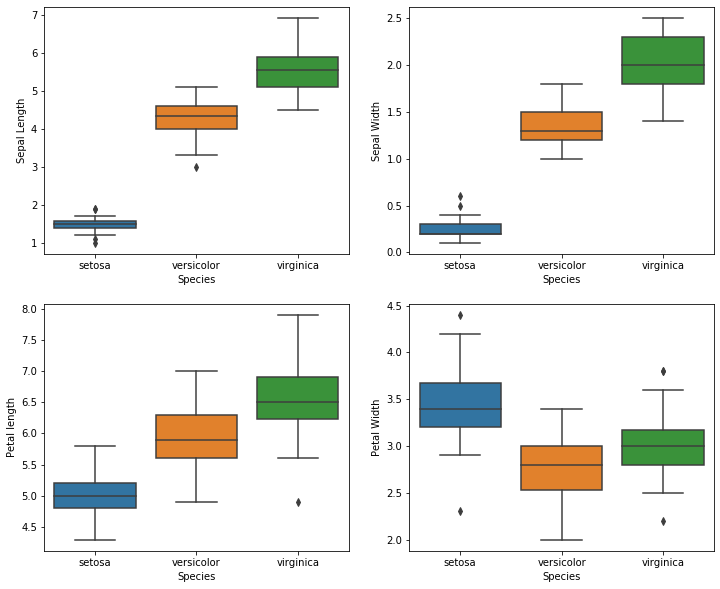

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='Sepal Length',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='Sepal Width',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='Petal length',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='Petal Width',data=data)

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['Species'])
y =le.transform(data['Species'])

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

DT = DecisionTreeClassifier(random_state=0)
cross_val_score(DT, data[['Petal length','Petal Width','Sepal Length']], y, cv=10)

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.86666667, 0.93333333, 0.93333333, 1.        , 0.93333333])

In [17]:
from sklearn.svm import SVC

svm_clf =SVC(gamma='auto')

cross_val_score(svm_clf, data[['Petal length','Petal Width','Sepal Length']], y, cv=10)

array([0.93333333, 0.93333333, 1.        , 1.        , 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [18]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(max_depth=2, random_state=0)
cross_val_score(RFC, data[['Petal length','Petal Width','Sepal Length']], y, cv=10)

array([0.8       , 0.86666667, 1.        , 1.        , 0.86666667,
       0.8       , 0.93333333, 0.86666667, 1.        , 1.        ])

In [19]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
cross_val_score(RFC, data[['Petal length','Petal Width','Sepal Length']], y, cv=10)

array([0.8       , 0.86666667, 1.        , 1.        , 0.86666667,
       0.8       , 0.93333333, 0.86666667, 1.        , 1.        ])